IMPORT DAS BASES

In [1]:
import pandas as pd
import numpy as np

# Carregando as bases
colaboradores = pd.read_excel('/content/Colaboradores.xlsx')
df_afastados = pd.read_excel('/content/Afastados.xlsx')
df_atestados = pd.read_excel('/content/Atestados.xlsx')

# Visualizar informações iniciais
print(colaboradores.info())
print(df_afastados.info())
print(df_atestados.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127841 entries, 0 to 127840
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   MÊS              127841 non-null  datetime64[ns]
 1   MATRICULA        127841 non-null  int64         
 2   CENTRO DE CUSTO  127841 non-null  object        
 3   N°               127841 non-null  object        
 4   CARGO            127841 non-null  object        
 5   ADMISSAO         127841 non-null  datetime64[ns]
 6   DEMISSAO         127841 non-null  object        
 7   IDADE            127841 non-null  int64         
 8   SEXO             127841 non-null  object        
 9   RACA/COR         127841 non-null  object        
 10  SIT. FOLHA       127841 non-null  object        
 11  ESTADO           127841 non-null  object        
 12  EMPRESA          127841 non-null  object        
 13  MESES            127841 non-null  int64         
 14  DIRETOR          127

## EDA - COLABORADORES

In [2]:
# EDA da base de colaboradores: carregamento e verificação de nulos e duplicados
import pandas as pd

colaboradores = pd.read_excel("/content/Colaboradores.xlsx")

print(colaboradores.isnull().sum())

print(colaboradores.duplicated().sum())


MÊS                0
MATRICULA          0
CENTRO DE CUSTO    0
N°                 0
CARGO              0
ADMISSAO           0
DEMISSAO           0
IDADE              0
SEXO               0
RACA/COR           0
SIT. FOLHA         0
ESTADO             0
EMPRESA            0
MESES              0
DIRETOR            0
TIPO               0
NF                 0
DESCR_RECISAO      0
CARGA              0
dtype: int64
0


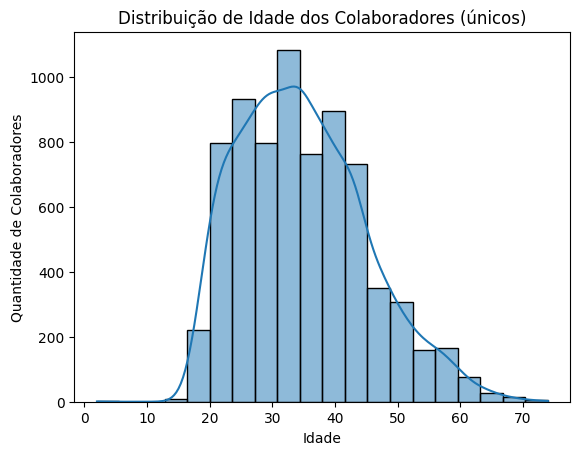

In [3]:
# Distribuição de idade dos colaboradores únicos
import matplotlib.pyplot as plt
import seaborn as sns

colaboradores_unicos = colaboradores.drop_duplicates(subset='MATRICULA')

sns.histplot(colaboradores_unicos['IDADE'], bins=20, kde=True)
plt.title("Distribuição de Idade dos Colaboradores (únicos)")
plt.xlabel("Idade")
plt.ylabel("Quantidade de Colaboradores")
plt.show()


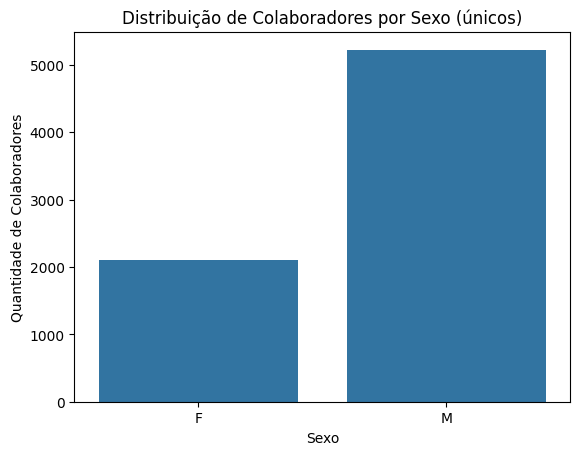

In [4]:
# Distribuição de colaboradores por sexo (considerando apenas registros únicos)
sns.countplot(x='SEXO', data=colaboradores_unicos)
plt.title("Distribuição de Colaboradores por Sexo (únicos)")
plt.xlabel("Sexo")
plt.ylabel("Quantidade de Colaboradores")
plt.show()


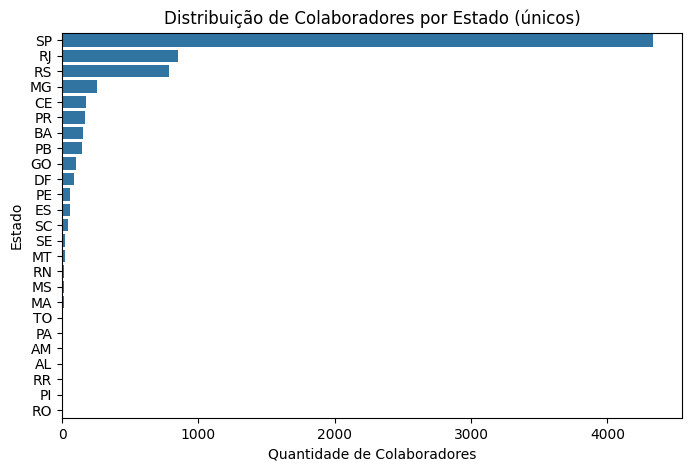

In [5]:
# Distribuição de colaboradores por estado (considerando apenas registros únicos)
plt.figure(figsize=(8,5))
sns.countplot(y='ESTADO', data=colaboradores_unicos, order=colaboradores_unicos['ESTADO'].value_counts().index)
plt.title("Distribuição de Colaboradores por Estado (únicos)")
plt.xlabel("Quantidade de Colaboradores")
plt.ylabel("Estado")
plt.show()


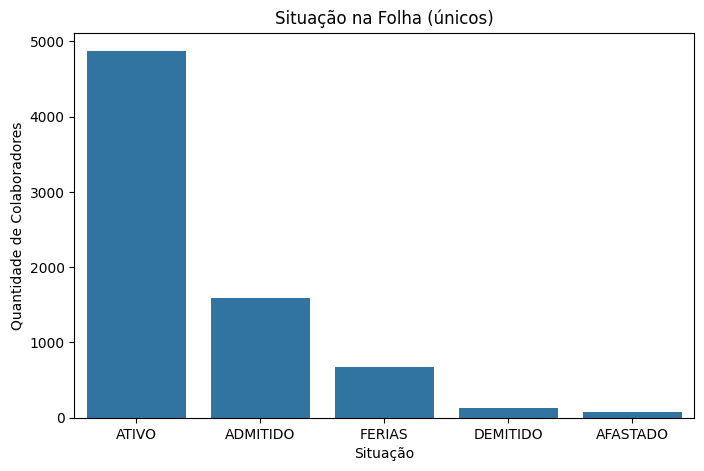

In [6]:
# Distribuição da situação funcional na folha (considerando apenas colaboradores únicos)
plt.figure(figsize=(8,5))
sns.countplot(x='SIT. FOLHA', data=colaboradores_unicos, order=colaboradores_unicos['SIT. FOLHA'].value_counts().index)
plt.title("Situação na Folha (únicos)")
plt.xlabel("Situação")
plt.ylabel("Quantidade de Colaboradores")
plt.show()


## EDA - AFASTADOS

In [7]:
# EDA da base de afastados: verificação de valores nulos e duplicados
print(df_afastados.isnull().sum())

duplicados = df_afastados.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")


MATRICULA                  0
DATA INICIO                0
DATA FIM                   0
TIPO AFASTAMENTO           0
DESC_TIPO_AFASTAMENTO      3
CID                      222
DESCRICAO CID            222
dtype: int64
Número de registros duplicados: 0


In [8]:
# Conversão das colunas de datas para o tipo datetime na base de afastados
df_afastados['DATA INICIO'] = pd.to_datetime(df_afastados['DATA INICIO'], errors='coerce')
df_afastados['DATA FIM'] = pd.to_datetime(df_afastados['DATA FIM'], errors='coerce')

df_afastados[['DATA INICIO', 'DATA FIM']].head()


,DATA INICIO,DATA FIM
0,2023-03-15,2023-05-13
1,2024-07-27,2025-01-02
2,2024-08-31,2024-12-28
3,2012-10-08,NaT
4,2015-03-19,2023-02-15


In [9]:
# Cálculo da duração de cada afastamento em dias
df_afastados['DURACAO_DIAS'] = (df_afastados['DATA FIM'] - df_afastados['DATA INICIO']).dt.days


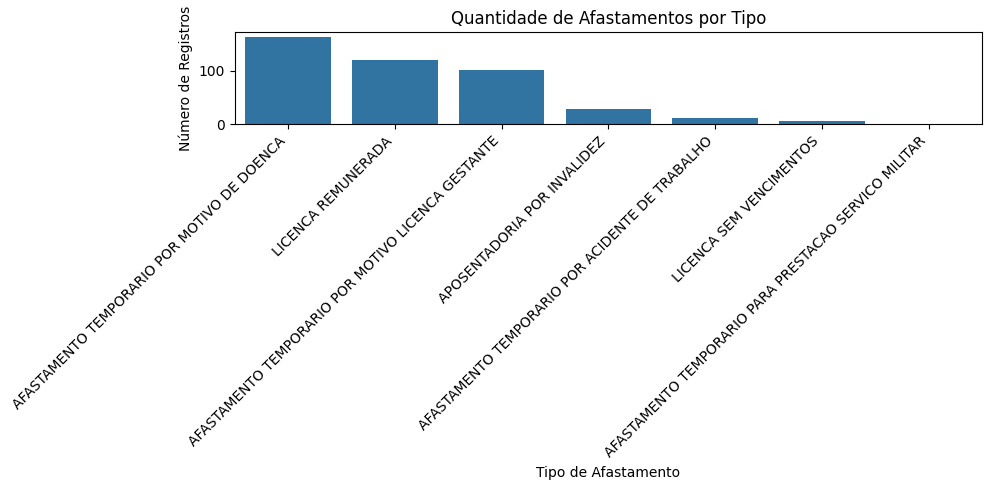

In [10]:
# Gráfico da quantidade de afastamentos por tipo
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df_afastados, x='DESC_TIPO_AFASTAMENTO', order=df_afastados['DESC_TIPO_AFASTAMENTO'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Quantidade de Afastamentos por Tipo')
plt.xlabel('Tipo de Afastamento')
plt.ylabel('Número de Registros')
plt.tight_layout()
plt.show()


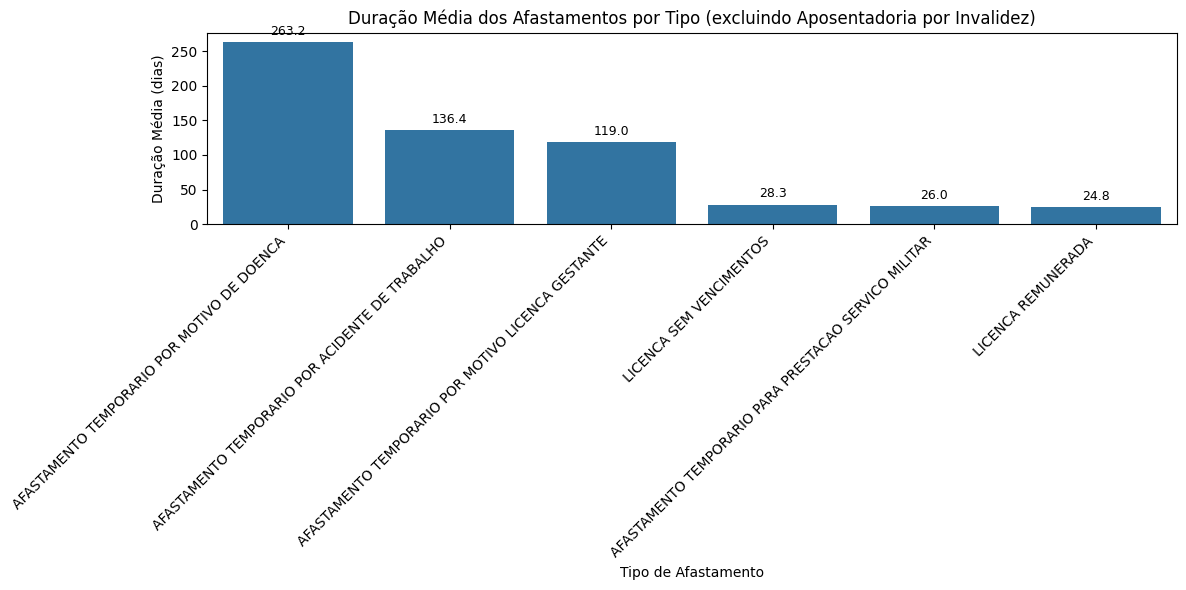

In [11]:
# Gráfico da duração média dos afastamentos por tipo, excluindo aposentadoria por invalidez
df_afastados_temp = df_afastados[df_afastados['DESC_TIPO_AFASTAMENTO'] != 'APOSENTADORIA POR INVALIDEZ']

duracao_media = df_afastados_temp.groupby('DESC_TIPO_AFASTAMENTO')['DURACAO_DIAS'].mean().reset_index()

duracao_media_sorted = duracao_media.sort_values('DURACAO_DIAS', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=duracao_media_sorted, x='DESC_TIPO_AFASTAMENTO', y='DURACAO_DIAS')

plt.xticks(rotation=45, ha='right')
plt.title('Duração Média dos Afastamentos por Tipo (excluindo Aposentadoria por Invalidez)')
plt.xlabel('Tipo de Afastamento')
plt.ylabel('Duração Média (dias)')


for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()


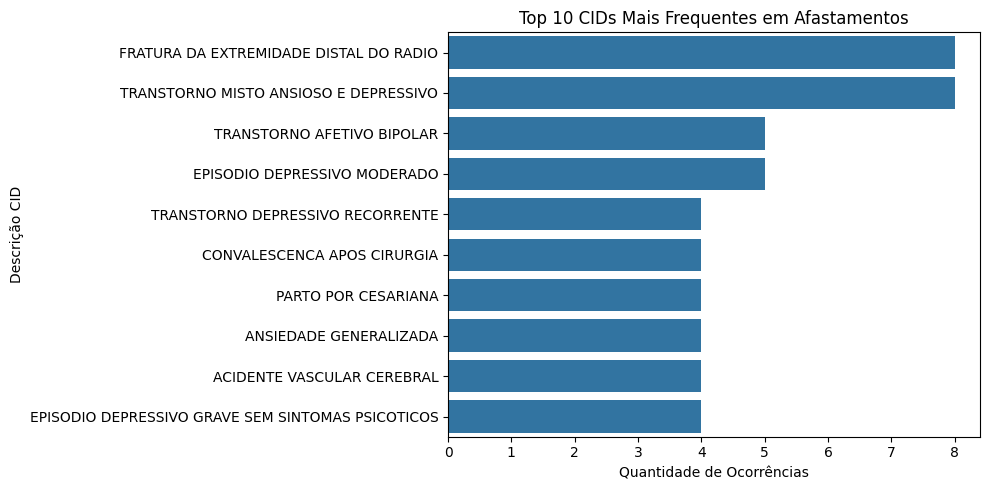

In [12]:
# Gráfico dos 10 CIDs mais frequentes em afastamentos
plt.figure(figsize=(10, 5))
cid_freq = df_afastados['DESCRICAO CID'].value_counts().head(10)
sns.barplot(x=cid_freq.values, y=cid_freq.index)
plt.title('Top 10 CIDs Mais Frequentes em Afastamentos')
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Descrição CID')
plt.tight_layout()
plt.show()


## EDA ATESTADOS

In [13]:
# EDA inicial da base de atestados: visualização das informações gerais, verificação de nulos e duplicados
df_atestados.info()
df_atestados.head()

print("Valores nulos por coluna:")
print(df_atestados.isnull().sum())

duplicados = df_atestados.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21926 entries, 0 to 21925
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   MATRICULA    21926 non-null  int64         
 1   DATA         19903 non-null  datetime64[ns]
 2   COMPETENCIA  21926 non-null  datetime64[ns]
 3   COD          21926 non-null  int64         
 4   DESC COD     21926 non-null  object        
 5   QTD          21926 non-null  object        
 6   HORAS        21926 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 1.2+ MB
Valores nulos por coluna:
MATRICULA         0
DATA           2023
COMPETENCIA       0
COD               0
DESC COD          0
QTD               0
HORAS             0
dtype: int64
Número de registros duplicados: 1128


In [14]:
# Conversão da coluna DATA para datetime
df_atestados['DATA'] = pd.to_datetime(df_atestados['DATA'], errors='coerce')

# Garantir que HORAS esteja num formato numérico
df_atestados['HORAS'] = pd.to_numeric(df_atestados['HORAS'], errors='coerce')


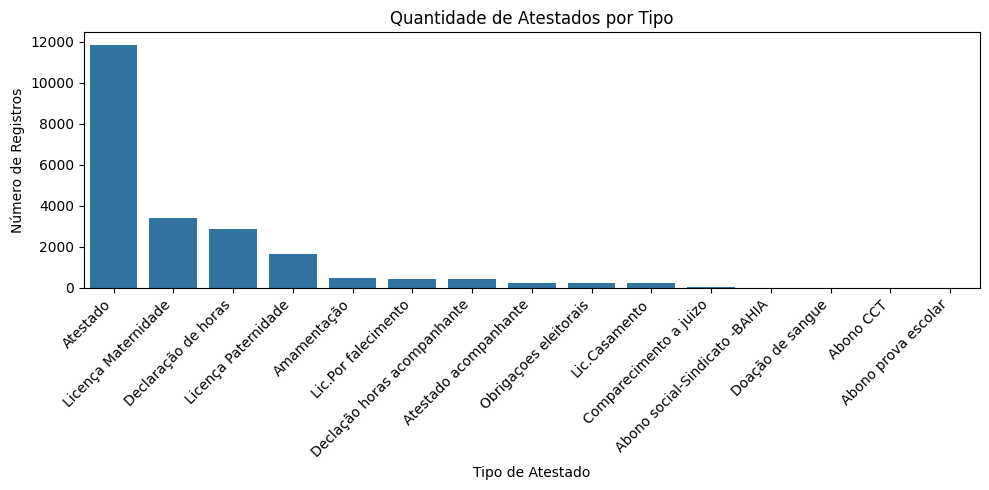

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df_atestados, x='DESC COD', order=df_atestados['DESC COD'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Quantidade de Atestados por Tipo')
plt.xlabel('Tipo de Atestado')
plt.ylabel('Número de Registros')
plt.tight_layout()
plt.show()


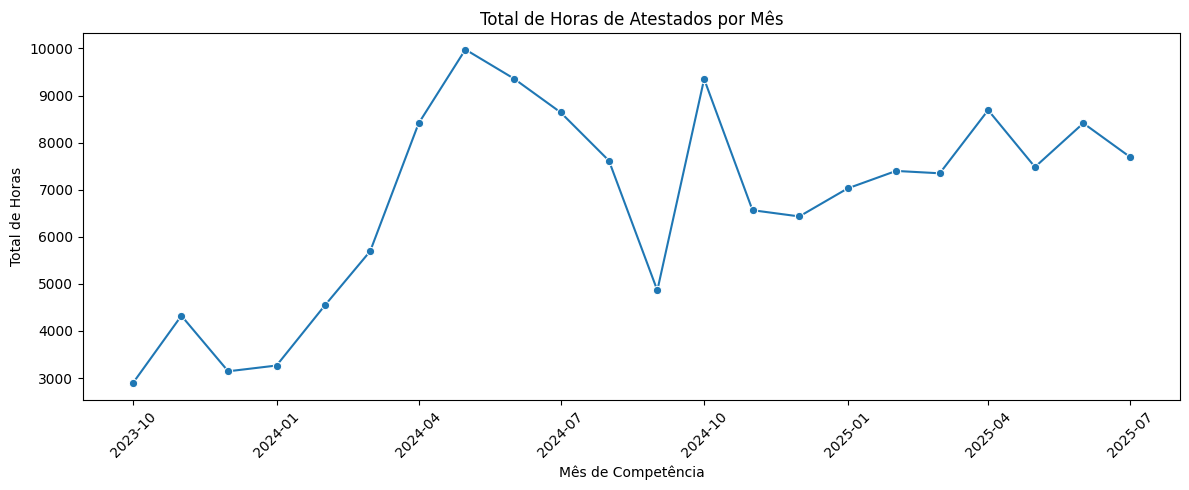

In [16]:
# Gráfico da quantidade de atestados por tipo
horas_por_mes = df_atestados.groupby('COMPETENCIA')['HORAS'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=horas_por_mes, x='COMPETENCIA', y='HORAS', marker='o')
plt.title('Total de Horas de Atestados por Mês')
plt.xlabel('Mês de Competência')
plt.ylabel('Total de Horas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


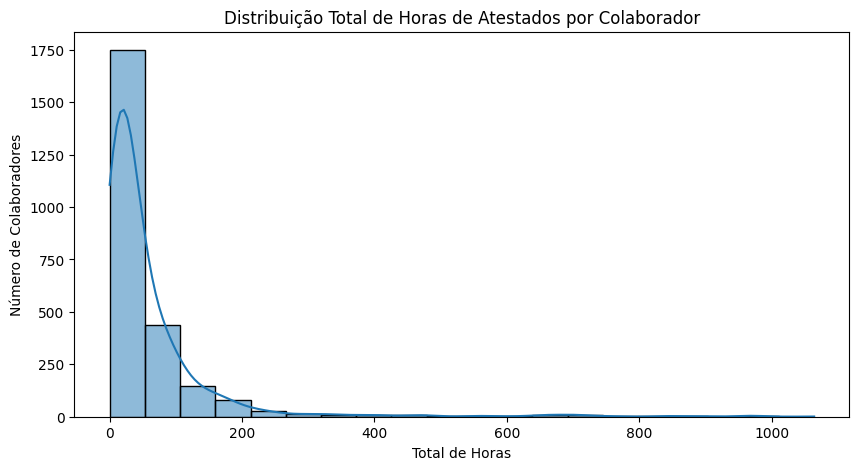

In [17]:
# Distribuição total de horas de atestados por colaborador
plt.figure(figsize=(10, 5))
sns.histplot(df_atestados.groupby('MATRICULA')['HORAS'].sum(), bins=20, kde=True)
plt.title('Distribuição Total de Horas de Atestados por Colaborador')
plt.xlabel('Total de Horas')
plt.ylabel('Número de Colaboradores')
plt.show()


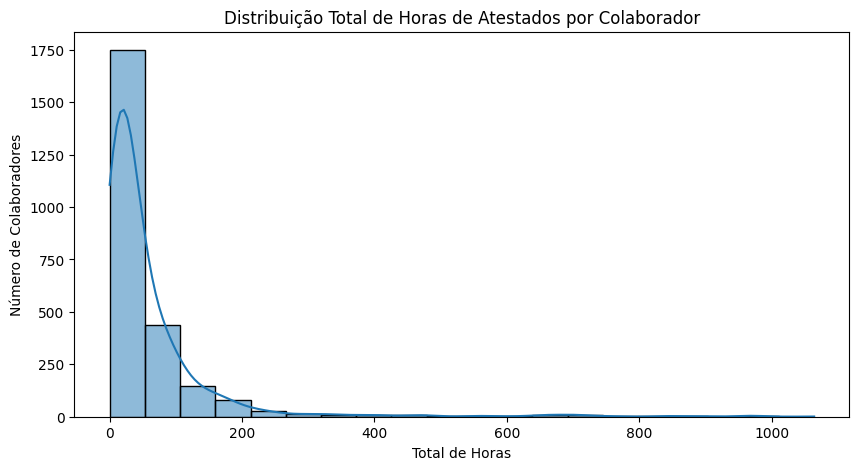

In [18]:
# Histograma da distribuição total de horas de atestados por colaborador
plt.figure(figsize=(10, 5))
sns.histplot(df_atestados.groupby('MATRICULA')['HORAS'].sum(), bins=20, kde=True)
plt.title('Distribuição Total de Horas de Atestados por Colaborador')
plt.xlabel('Total de Horas')
plt.ylabel('Número de Colaboradores')
plt.show()


## PRE-PROCESSAMENTO

In [19]:
# Pré-processamento inicial: carregamento das três bases e verificação dos tipos de dados
import pandas as pd
import numpy as np

colaboradores = pd.read_excel('/content/Colaboradores.xlsx')
df_afastados = pd.read_excel('/content/Afastados.xlsx')
df_atestados = pd.read_excel('/content/Atestados.xlsx')

print(colaboradores.info())
print(df_afastados.info())
print(df_atestados.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127841 entries, 0 to 127840
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   MÊS              127841 non-null  datetime64[ns]
 1   MATRICULA        127841 non-null  int64         
 2   CENTRO DE CUSTO  127841 non-null  object        
 3   N°               127841 non-null  object        
 4   CARGO            127841 non-null  object        
 5   ADMISSAO         127841 non-null  datetime64[ns]
 6   DEMISSAO         127841 non-null  object        
 7   IDADE            127841 non-null  int64         
 8   SEXO             127841 non-null  object        
 9   RACA/COR         127841 non-null  object        
 10  SIT. FOLHA       127841 non-null  object        
 11  ESTADO           127841 non-null  object        
 12  EMPRESA          127841 non-null  object        
 13  MESES            127841 non-null  int64         
 14  DIRETOR          127

In [20]:
# Colaboradores
colaboradores['MÊS'] = pd.to_datetime(colaboradores['MÊS'], errors='coerce')
colaboradores['ADMISSAO'] = pd.to_datetime(colaboradores['ADMISSAO'], errors='coerce')
colaboradores['DEMISSAO'] = pd.to_datetime(colaboradores['DEMISSAO'], errors='coerce')
colaboradores['CARGA'] = pd.to_numeric(colaboradores['CARGA'], errors='coerce')

# Afastados
df_afastados['DATA INICIO'] = pd.to_datetime(df_afastados['DATA INICIO'], errors='coerce')
df_afastados['DATA FIM'] = pd.to_datetime(df_afastados['DATA FIM'], errors='coerce')
df_afastados['DURACAO_DIAS'] = (df_afastados['DATA FIM'] - df_afastados['DATA INICIO']).dt.days

# Atestados
df_atestados['DATA'] = pd.to_datetime(df_atestados['DATA'], errors='coerce')
df_atestados['HORAS'] = pd.to_numeric(df_atestados['HORAS'], errors='coerce')


/tmp/ipython-input-3179037322.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  colaboradores['DEMISSAO'] = pd.to_datetime(colaboradores['DEMISSAO'], errors='coerce')


In [21]:
# Remover duplicados
colaboradores = colaboradores.drop_duplicates()
df_afastados = df_afastados.drop_duplicates()
df_atestados = df_atestados.drop_duplicates()

# Filtrar afastamentos permanentes (aposentadoria por invalidez)
df_afastados = df_afastados[df_afastados['DESC_TIPO_AFASTAMENTO'] != 'APOSENTADORIA POR INVALIDEZ']


In [22]:
# Garantir que matrícula seja do mesmo tipo
colaboradores['MATRICULA'] = colaboradores['MATRICULA'].astype(int)
df_afastados['MATRICULA'] = df_afastados['MATRICULA'].astype(int)
df_atestados['MATRICULA'] = df_atestados['MATRICULA'].astype(int)


In [23]:
# Colaboradores: faixa etária
bins = [15, 25, 35, 45, 55, 65, 75]
labels = ['15-25','26-35','36-45','46-55','56-65','66-75']
colaboradores['FAIXA_ETARIA'] = pd.cut(colaboradores['IDADE'], bins=bins, labels=labels, include_lowest=True)

# Afastados: mês e ano de início
df_afastados['MES_INICIO'] = df_afastados['DATA INICIO'].dt.to_period('M')
df_afastados['ANO_INICIO'] = df_afastados['DATA INICIO'].dt.year

# Atestados: mês de competência
df_atestados['MES_COMPETENCIA'] = df_atestados['COMPETENCIA'].dt.to_period('M')


In [25]:
# agregando afastamentos por mês
afast_mensal = df_afastados.groupby('MES_INICIO').size().reset_index(name='afastamentos_inicio_mes')

# agregando horas de atestados por mês
atest_mensal = df_atestados.groupby('MES_COMPETENCIA')['HORAS'].sum().reset_index(name='horas_atestado')

# quantidade de colaboradores únicos por mês
colab_mensal = colaboradores.groupby('MÊS')['MATRICULA'].nunique().reset_index(name='colaboradores_ativos')

# unindo tudo
base_mensal = afast_mensal.merge(atest_mensal, left_on='MES_INICIO', right_on='MES_COMPETENCIA', how='outer')
base_mensal = base_mensal.merge(colab_mensal, left_on='MES_INICIO', right_on='MÊS', how='outer')

# limpando colunas
base_mensal = base_mensal.rename(columns={'MES_INICIO': 'MES'})[['MES','afastamentos_inicio_mes','horas_atestado','colaboradores_ativos']]
base_mensal = base_mensal.sort_values('MES')


MODELAGEM

In [26]:
# TRATAMENTO DA BASE CONSOLIDADA

# Substituir valores nulos por zero
base_mensal = base_mensal.fillna(0)

# Converter coluna 'MES' para datetime (caso ainda esteja em formato Period)
base_mensal['MES'] = base_mensal['MES'].astype(str).str.replace(' ', '')
base_mensal['MES'] = pd.to_datetime(base_mensal['MES'], errors='coerce')

# Garantir ordenação temporal
base_mensal = base_mensal.sort_values('MES').reset_index(drop=True)

# Visualizar os primeiros registros
print("Prévia da base consolidada:")
display(base_mensal.head(10))

# Conferir se há valores faltantes
print("\nValores ausentes por coluna:")
print(base_mensal.isnull().sum())


Prévia da base consolidada:


,MES,afastamentos_inicio_mes,horas_atestado,colaboradores_ativos
0,2007-01-01,1.0,0.0,0.0
1,2010-11-01,1.0,0.0,0.0
2,2012-10-01,1.0,0.0,0.0
3,2015-03-01,1.0,0.0,0.0
4,2015-11-01,1.0,0.0,0.0
5,2016-01-01,1.0,0.0,0.0
6,2016-02-01,1.0,0.0,0.0
7,2016-03-01,1.0,0.0,0.0
8,2016-10-01,1.0,0.0,0.0
9,2017-07-01,1.0,0.0,0.0



Valores ausentes por coluna:
MES                        31
afastamentos_inicio_mes     0
horas_atestado              0
colaboradores_ativos        0
dtype: int64


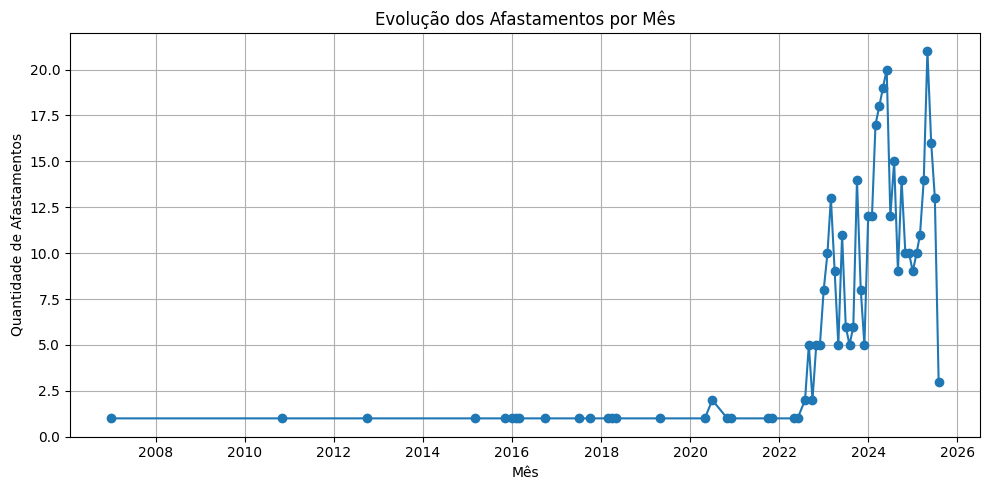

In [27]:
# VISUALIZAÇÃO DA SÉRIE TEMPORAL

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(base_mensal['MES'], base_mensal['afastamentos_inicio_mes'], marker='o')
plt.title('Evolução dos Afastamentos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Afastamentos')
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Ver duplicatas por mês
dup_counts = base_mensal['MES'].astype(str).value_counts()
print("Meses com mais de 1 linha:", (dup_counts > 1).sum())
dup_counts.head(10)



Meses com mais de 1 linha: 1


,count
MES,
NaT,31
2010-11-01,1
2012-10-01,1
2015-03-01,1
2007-01-01,1
2016-01-01,1
2016-02-01,1
2016-03-01,1
2016-10-01,1


In [31]:
# Normalizar 'MES' e agregar as duplicatas
bm = base_mensal.copy()

# Garantir datetime
bm['MES'] = pd.to_datetime(bm['MES'], errors='coerce')

# Converter para o primeiro dia de cada mês
bm['MES'] = bm['MES'].dt.to_period('M').dt.to_timestamp()

# Agregar por MES (somando colunas numéricas)
bm = (
    bm.groupby('MES', as_index=False)
      .agg({
          'afastamentos_inicio_mes': 'sum',
          'horas_atestado': 'sum',
          'colaboradores_ativos': 'sum'  # pode trocar por 'max' se preferir
      })
      .sort_values('MES')
      .reset_index(drop=True)
)

display(bm.head(10))



,MES,afastamentos_inicio_mes,horas_atestado,colaboradores_ativos
0,2007-01-01,1.0,0.0,0.0
1,2010-11-01,1.0,0.0,0.0
2,2012-10-01,1.0,0.0,0.0
3,2015-03-01,1.0,0.0,0.0
4,2015-11-01,1.0,0.0,0.0
5,2016-01-01,1.0,0.0,0.0
6,2016-02-01,1.0,0.0,0.0
7,2016-03-01,1.0,0.0,0.0
8,2016-10-01,1.0,0.0,0.0
9,2017-07-01,1.0,0.0,0.0


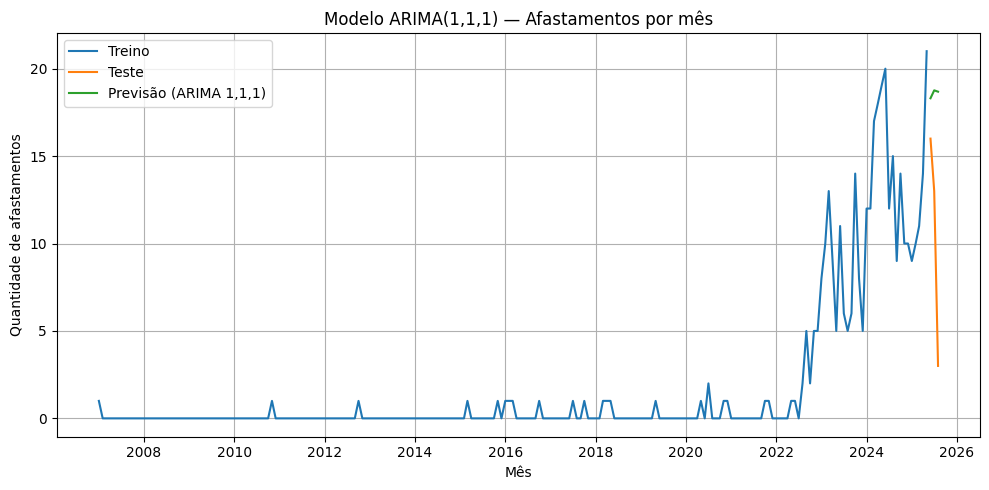

🔹 ARIMA(1,1,1)
MAE: 7.917398892799468
RMSE: 9.738267286340244


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Série temporal (agora sem duplicatas)
serie = bm.set_index('MES')['afastamentos_inicio_mes'].sort_index().asfreq('MS').fillna(0)

# Split temporal (3 últimos meses)
if len(serie) < 6:
    train = serie.copy()
    test = None
else:
    train = serie.iloc[:-3]
    test  = serie.iloc[-3:]

# Ajuste ARIMA(1,1,1)
model = SARIMAX(train, order=(1,1,1), enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

# Previsão + métricas (usar raiz do MSE para RMSE — compatível com qualquer versão do sklearn)
if test is not None and len(test) > 0:
    forecast = res.get_forecast(steps=len(test)).predicted_mean
    mae  = float(mean_absolute_error(test, forecast))
    rmse = float(mean_squared_error(test, forecast) ** 0.5)
else:
    forecast = res.get_forecast(steps=3).predicted_mean
    mae = rmse = None

# Plot
plt.figure(figsize=(10,5))
plt.plot(train.index, train.values, label='Treino')
if test is not None and len(test) > 0:
    plt.plot(test.index, test.values, label='Teste')
plt.plot(forecast.index, forecast.values, label='Previsão (ARIMA 1,1,1)')
plt.title('Modelo ARIMA(1,1,1) — Afastamentos por mês')
plt.xlabel('Mês'); plt.ylabel('Quantidade de afastamentos'); plt.legend(); plt.grid(True)
plt.tight_layout(); plt.show()

print("🔹 ARIMA(1,1,1)")
print("MAE:", mae)
print("RMSE:", rmse)


AVALIAÇÃO E VALIDAÇÃO

In [33]:
# Tabela de métricas e intervalo de confiança

import pandas as pd
import numpy as np

# Baseline ingênuo (naive): repete o último valor do treino
if test is not None and len(test) > 0:
    naive_fc = pd.Series([train.iloc[-1]] * len(test), index=test.index)
    mae_naive  = float(np.mean(np.abs(test - naive_fc)))
    rmse_naive = float(np.sqrt(np.mean((test - naive_fc)**2)))
else:
    mae_naive = rmse_naive = None

# Intervalo de confiança 95% das previsões ARIMA
if test is not None and len(test) > 0:
    fc_obj = res.get_forecast(steps=len(test))
else:
    fc_obj = res.get_forecast(steps=3)

fc_mean = fc_obj.predicted_mean
fc_ci   = fc_obj.conf_int(alpha=0.05)  # 95%

print("Intervalo de confiança (95%) das previsões:")
display(fc_ci)

# Tabela de métricas
metricas = pd.DataFrame({
    "Modelo": ["ARIMA(1,1,1)", "Naive"],
    "MAE":    [mae, mae_naive],
    "RMSE":   [rmse, rmse_naive]
})
display(metricas)


Intervalo de confiança (95%) das previsões:


,lower afastamentos_inicio_mes,upper afastamentos_inicio_mes
2025-06-01,15.277321,21.337939
2025-07-01,15.153282,22.367408
2025-08-01,14.491593,22.876851


,Modelo,MAE,RMSE
0,"ARIMA(1,1,1)",7.917399,9.738267
1,Naive,10.333333,11.733144


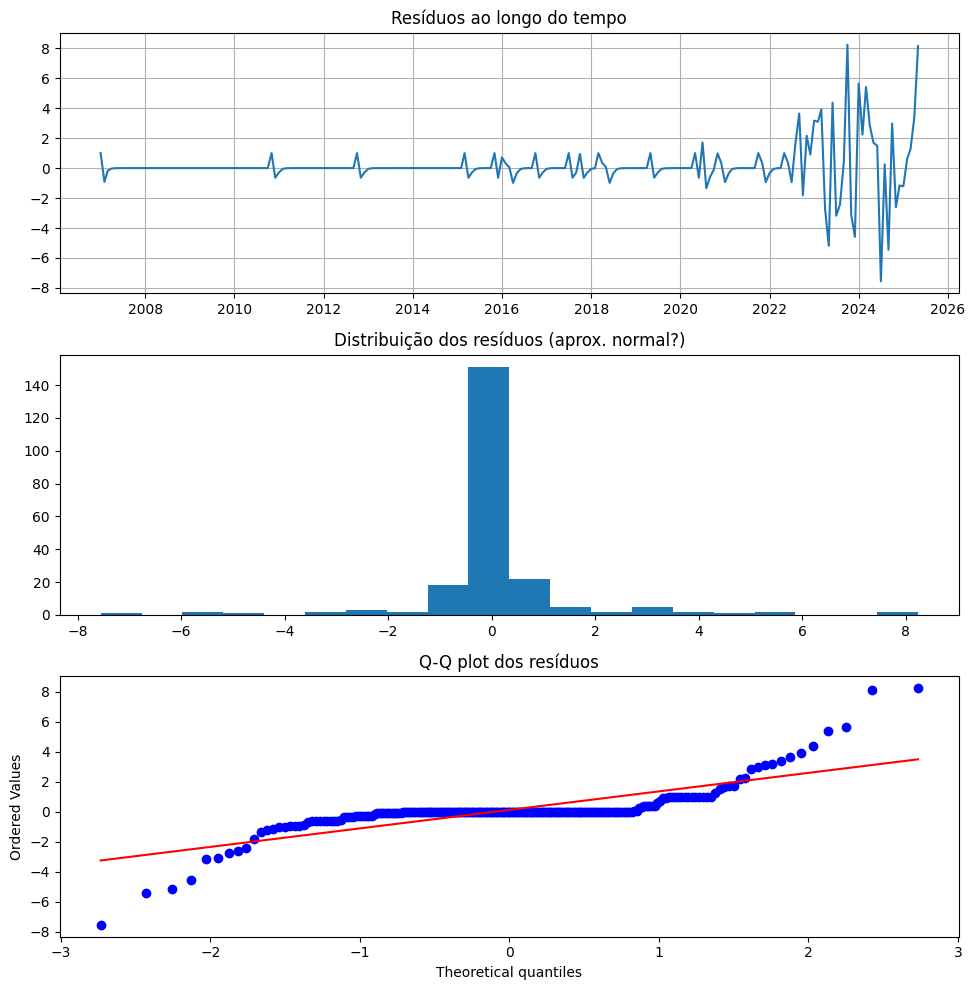

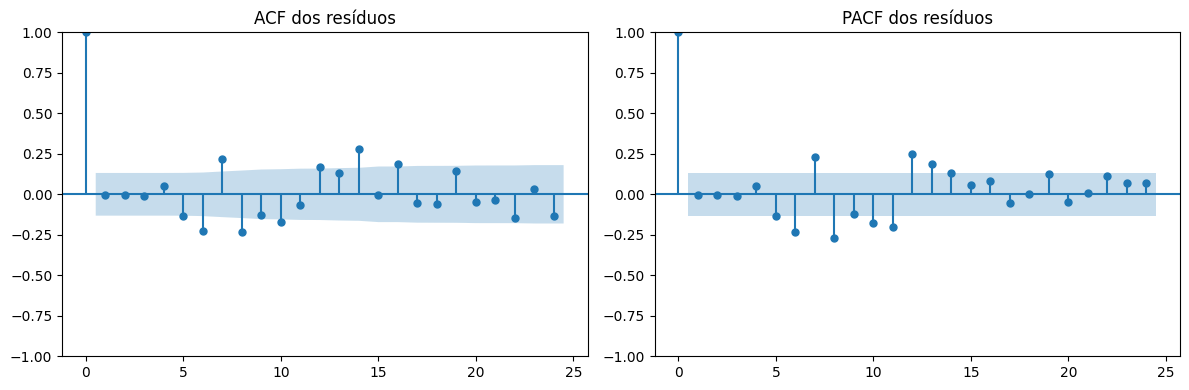

Ljung-Box (p-valores):


,lb_stat,lb_pvalue
6,16.412232,1.170432e-02
12,58.665626,3.947566e-08


In [34]:
# Diagnóstico de resíduos (validação estatística)

import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

residuos = res.resid.dropna()

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(residuos)
ax[0].set_title("Resíduos ao longo do tempo"); ax[0].grid(True)

# Histograma + curva normal
ax[1].hist(residuos, bins=20)
ax[1].set_title("Distribuição dos resíduos (aprox. normal?)")

# QQ-plot (normalidade)
st.probplot(residuos, dist="norm", plot=ax[2])
ax[2].set_title("Q-Q plot dos resíduos")
plt.tight_layout(); plt.show()

# ACF/PACF dos resíduos
fig, ax = plt.subplots(1, 2, figsize=(12,4))
plot_acf(residuos, lags=min(24, len(residuos)-1), ax=ax[0])
plot_pacf(residuos, lags=min(24, len(residuos)-1), ax=ax[1], method="ywm")
ax[0].set_title("ACF dos resíduos"); ax[1].set_title("PACF dos resíduos")
plt.tight_layout(); plt.show()

# Teste de Ljung-Box (H0: não há autocorrelação)
lb = acorr_ljungbox(residuos, lags=[6, 12], return_df=True)
print("Ljung-Box (p-valores):")
display(lb)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Backtest (métricas por janela):


,corte,MAE,RMSE
0,2008-12-01,0.0,0.0
1,2009-01-01,0.0,0.0
2,2009-02-01,0.0,0.0
3,2009-03-01,0.0,0.0
4,2009-04-01,0.0,0.0


Médias do backtest: 0.9116748184156864 1.0389038126817565


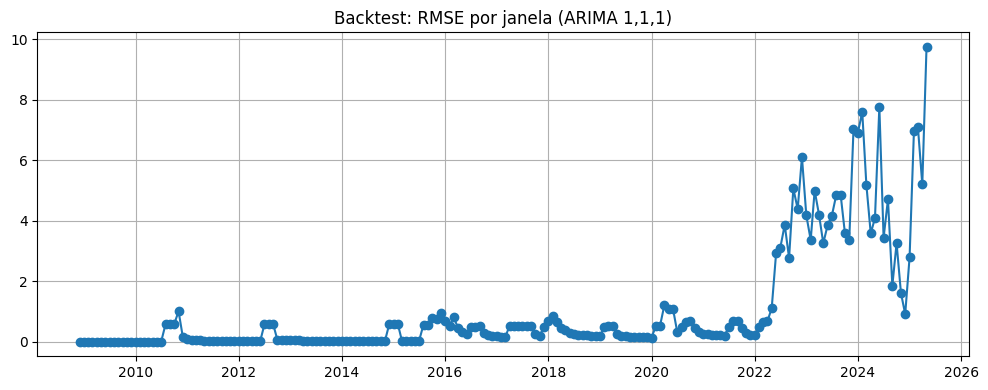

In [35]:
#Backtesting (validação por janela deslizante)

from sklearn.metrics import mean_absolute_error, mean_squared_error

def backtest_arima(y, order=(1,1,1), initial=24, steps=3):
    """
    y: série mensal (pandas.Series) com freq 'MS'
    initial: número mínimo de pontos para iniciar a primeira janela de treino
    steps: horizonte de previsão em meses
    """
    maes, rmses = [], []
    cutpoints = []
    for end in range(initial, len(y) - steps + 1):
        train_bt = y.iloc[:end]
        test_bt  = y.iloc[end:end+steps]

        m = SARIMAX(train_bt, order=order, enforce_stationarity=False, enforce_invertibility=False)
        r = m.fit(disp=False)
        fc_bt = r.get_forecast(steps=len(test_bt)).predicted_mean

        maes.append(mean_absolute_error(test_bt, fc_bt))
        rmses.append(np.sqrt(mean_squared_error(test_bt, fc_bt)))
        cutpoints.append(train_bt.index[-1])

    return pd.DataFrame({"corte": cutpoints, "MAE": maes, "RMSE": rmses})

# roda backtest na sua série 'serie'
bt = backtest_arima(serie, order=(1,1,1), initial=min(24, max(12, len(serie)//3)), steps=3)
print("Backtest (métricas por janela):")
display(bt.head())
print("Médias do backtest:", bt.MAE.mean(), bt.RMSE.mean())

plt.figure(figsize=(10,4))
plt.plot(bt["corte"], bt["RMSE"], marker='o')
plt.title("Backtest: RMSE por janela (ARIMA 1,1,1)"); plt.grid(True)
plt.tight_layout(); plt.show()


In [36]:
# sMAPE e MAPE

def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    # evita divisão por zero
    denom = np.where(denom == 0, 1, denom)
    return float(np.mean(np.abs(y_true - y_pred) / denom) * 100)

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denom = np.where(y_true == 0, 1, y_true)
    return float(np.mean(np.abs((y_true - y_pred) / denom)) * 100)

if test is not None and len(test) > 0:
    print("sMAPE (ARIMA 1,1,1):", smape(test, forecast))
    print("MAPE  (ARIMA 1,1,1):", mape(test, forecast))


sMAPE (ARIMA 1,1,1): 64.79553882356515
MAPE  (ARIMA 1,1,1): 193.84681073650862
